#### Here it is my intent to look at how the data compares given the excess mortality columns which were excluded from earlier analysis

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df_vaccines = pd.read_csv('../data/COVID_VACCINATIONS.csv')
df_deaths = pd.read_csv('../data/COVID DEATHS.csv')
merged_df = pd.merge(df_deaths, df_vaccines, left_index=True, right_index=True)

In [30]:
merged_df.head()

,iso_code_x,continent_x,location_x,date_x,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,1/3/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN


In [31]:
columns_to_drop = ['iso_code_y', 'continent_y', 'location_y', 'date_y',
    'total_cases', 'new_cases', 'new_deaths',
    'total_cases_per_million', 'new_cases_per_million',
    'new_deaths_per_million',
    'icu_patients', 'hosp_patients', 'weekly_icu_admissions', 'weekly_hosp_admissions',
    'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
    'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
    'positive_rate', 'tests_per_case', 'tests_units',
    'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
    'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
    'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million',
    'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred',
    'stringency_index', 'handwashing_facilities']

main_df = merged_df.drop(columns = columns_to_drop).copy()

In [32]:
# Isolate what countries you want to use in countries_of_interest:
countries_of_interest = ['Brazil', 'China', 'United States', 'Russia', 'India']
filtered_df = main_df[main_df['location_x'].isin(countries_of_interest)]

# Convert 'date' column to datetime format
filtered_df['date'] = pd.to_datetime(filtered_df['date_x']) 

# Set 'date' as the DataFrame's index
filtered_df = filtered_df.set_index('date')  

C:\Users\trali\AppData\Local\Temp\ipykernel_21616\2023603807.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date_x'])


## First I will show the new deaths smoother per million and compare this with excess deaths

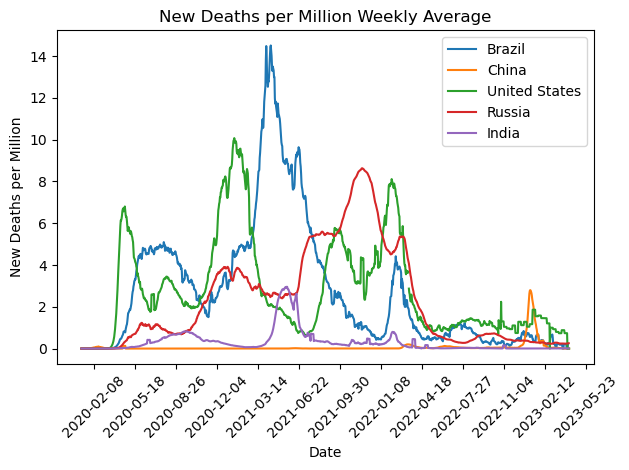

In [33]:
#Now do the same given these countries but focusing on the New Deaths Smoothed Column

#Setting up another variable here allows me to create a new visualization without breaking previous code
column_to_plot_a = 'new_deaths_smoothed_per_million'

for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location_x'] == country]
    plt.plot(country_data.index, country_data[column_to_plot_a], label=country)

# Set plot title and labels
plt.title('New Deaths per Million Weekly Average')
plt.xlabel('Date')
plt.ylabel('New Deaths per Million')

# Customize the x-axis tick labels to show every week
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))  # Max 20 tick labels on the x-axis

# Rotate the x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
filtered_df.head()


,iso_code_x,continent_x,location_x,date_x,population,new_cases_smoothed,total_deaths,new_deaths_smoothed,new_cases_smoothed_per_million,total_deaths_per_million,...,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,BRA,South America,Brazil,1/3/2020,215313504,NaN,NaN,NaN,NaN,NaN,...,8.11,10.1,17.9,2.2,75.88,0.77,NaN,NaN,NaN,NaN
2020-01-04,BRA,South America,Brazil,1/4/2020,215313504,NaN,NaN,NaN,NaN,NaN,...,8.11,10.1,17.9,2.2,75.88,0.77,NaN,NaN,NaN,NaN
2020-01-05,BRA,South America,Brazil,1/5/2020,215313504,NaN,NaN,NaN,NaN,NaN,...,8.11,10.1,17.9,2.2,75.88,0.77,NaN,NaN,NaN,NaN
2020-01-06,BRA,South America,Brazil,1/6/2020,215313504,NaN,NaN,NaN,NaN,NaN,...,8.11,10.1,17.9,2.2,75.88,0.77,NaN,NaN,NaN,NaN
2020-01-07,BRA,South America,Brazil,1/7/2020,215313504,NaN,NaN,NaN,NaN,NaN,...,8.11,10.1,17.9,2.2,75.88,0.77,NaN,NaN,NaN,NaN


In [42]:
grouped_df = main_df.groupby('location_x').agg({
    'total_deaths': max,
    'excess_mortality_cumulative_absolute': max,
    })

In [43]:
grouped_df.head(20)

,total_deaths,excess_mortality_cumulative_absolute
location_x,,
Afghanistan,7884.0,NaN
Africa,258841.0,NaN
Albania,3604.0,16604.00
Algeria,6881.0,49888.70
American Samoa,34.0,NaN
Andorra,159.0,140.20
Angola,1934.0,NaN
Anguilla,12.0,NaN
Antigua and Barbuda,146.0,3.10


In [44]:
grouped_df['death_excess_difference'] = grouped_df['total_deaths'] - grouped_df['excess_mortality_cumulative_absolute']

grouped_df.head(20)

,total_deaths,excess_mortality_cumulative_absolute,death_excess_difference
location_x,,,
Afghanistan,7884.0,NaN,NaN
Africa,258841.0,NaN,NaN
Albania,3604.0,16604.00,-13000.00
Algeria,6881.0,49888.70,-43007.70
American Samoa,34.0,NaN,NaN
Andorra,159.0,140.20,18.80
Angola,1934.0,NaN,NaN
Anguilla,12.0,NaN,NaN
Antigua and Barbuda,146.0,3.10,142.90


In [47]:
grouped_df.dropna()

,total_deaths,excess_mortality_cumulative_absolute,death_excess_difference
location_x,,,
Albania,3604.0,16604.00,-13000.00
Algeria,6881.0,49888.70,-43007.70
Andorra,159.0,140.20,18.80
Antigua and Barbuda,146.0,3.10,142.90
Argentina,130472.0,131388.00,-916.00
...,...,...,...
United Arab Emirates,2349.0,1172.00,1177.00
United Kingdom,212083.0,198994.56,13088.44
United States,1118800.0,1270101.80,-151301.80


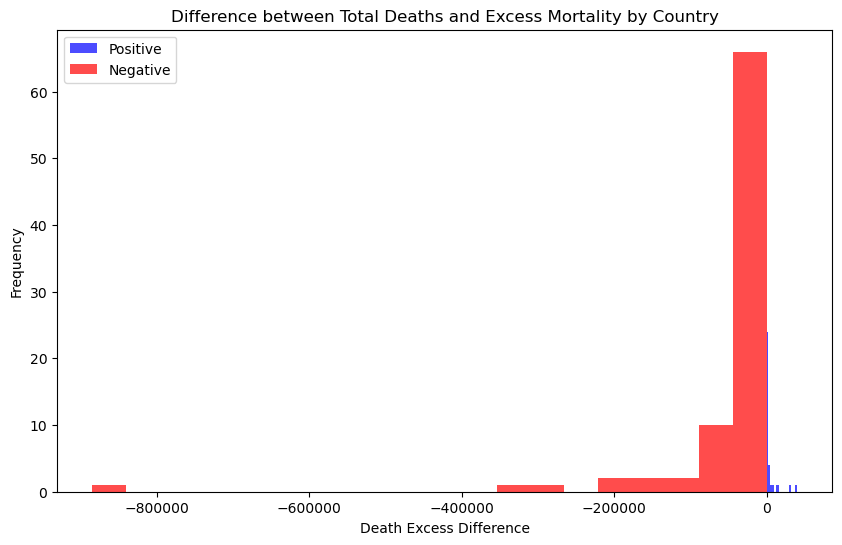

In [48]:
import matplotlib.pyplot as plt

# Filter the data into positive and negative differences
positive_diff = grouped_df[grouped_df['death_excess_difference'] > 0]
negative_diff = grouped_df[grouped_df['death_excess_difference'] <= 0]

# Create a histogram with positive values in blue and negative values in red
plt.figure(figsize=(10, 6))
plt.hist(positive_diff['death_excess_difference'], bins=20, color='blue', alpha=0.7, label='Positive')
plt.hist(negative_diff['death_excess_difference'], bins=20, color='red', alpha=0.7, label='Negative')

# Customize the plot
plt.title('Difference between Total Deaths and Excess Mortality by Country')
plt.xlabel('Death Excess Difference')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()
